In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

# Task 1

Дан массив. Необходимо создать новый массив, состоящий из элементов массива arr, которые больше среднего значения элементов массива arr.

In [ ]:
arr = np.array([134, 70, 85, 43, 14, 1000, 23, 75])

In [ ]:
new_arr = arr[arr > arr.mean()]
new_arr

array([1000])

# Task 2

Заполни пропуски в коде и реши задачу:

Исследователь хочет проверить, есть ли связь между количеством часов, проведенных за компьютером, и уровнем зрения у подростков. Для этого он собрал данные о 100 подростках, измерив количество часов, проведенных за компьютером, и уровень зрения каждого из них. Корреляция между этими двумя переменными составила 0.3. Необходимо проверить, является ли эта связь статистически значимой.

Шаг 1: Формулируем нулевую и альтернативную гипотезы:

H0: Нет связи между количеством часов, проведенных у компьютера, и уровнем зрения у подростков

H1: Количество часов, проведенных у компьютера, влияет на уровень зрения у подростков

Шаг 2: Вычисляем коэффициент корреляции Пирсона (есть в условии задачи):

In [ ]:
r = 0.3

Шаг 3: Определяем степень свободы (ориентируйся на количество измерений):

In [ ]:
df = 100 - 2

Шаг 4: Находим критическое значение t_crit для уровня значимости α = 0.05 и степеней свободы df, найденных на предыдущем шаге:

In [ ]:
α = 0.05
t_crit = scipy.stats.t.ppf(1 - α / 2, df)
t_crit

1.984467454426692

Шаг 5: Вычисляем статистическую значимость корреляции по формуле [![\\  t = r*\sqrt{\frac{df}{1-{r^{2}}}}](https://latex.codecogs.com/svg.latex?%5C%5C%20%20t%20%3D%20r*%5Csqrt%7B%5Cfrac%7Bdf%7D%7B1-%7Br%5E%7B2%7D%7D%7D%7D)](#_)

In [ ]:
t = r * np.sqrt(df/1-r**2)
t

2.9684844618087527

Шаг 6: Сравниваем полученное значение t с критическим значением tкрит, |t| > tкрит:

In [ ]:
if abs(t) > t_crit:
    print('Мы отвергаем нулевую гипотезу H0 об отсутствии связи между количеством часов, проведенных за компьютером, и уровнем зрения у подростков')
else:
    print('Мы принимаем нулевую гипотезу H0 об отсутствии связи между количеством часов, проведенных за компьютером, и уровнем зрения у подростков')

Мы отвергаем нулевую гипотезу H0 об отсутствии связи между количеством часов, проведенных за компьютером, и уровнем зрения у подростков


Шаг 7: Делаем выводы:

In [ ]:

print('Количество часов, проведенных за компьютером, оказывает влияние на уровень зрения у подростков')

Количество часов, проведенных за компьютером, оказывает влияние на уровень зрения у подростков


# Task 3

Отдел маркетинга хочет расширить бюджет закупки рекламы у блогеров и собрал некоторое количество коммерческих предложений. Так как конкретный регламент или стандарт на ценообразование отсутствует, нам необходимо определить, какие из предложений находятся в среднем ценовом диапазоне, а какие сильно завышены или занижены.

Порядок решения:
- визуализировать респределение с ценами в виде boxplot
- рассчитать интервартильный размах iqr
- вывести точки, которые выходят за диапазон ±iqr

In [ ]:
prices = np.array([100000, 120000, 500000, 130000, 140000, 150000, 400000,
                        160000, 170000, 180000, 190000, 200000, 300000, 600000])

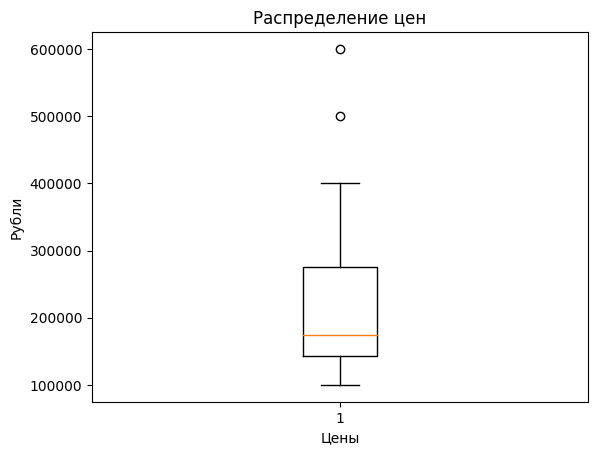

In [ ]:
plt.boxplot(prices)
plt.xlabel('Цены')
plt.ylabel('Рубли')
plt.title('Распределение цен')
plt.show()

In [ ]:
q3, q1 = np.percentile (prices, [75 ,25])
iqr = q3 - q1
print('Интерквартильный размах равен ', iqr)

Интерквартильный размах равен  132500.0


In [ ]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

outliers = prices[(prices < lower_limit) | (prices > upper_limit)]
print('Точки, выходящие за диапазон: ', outliers)

Точки, выходящие за диапазон:  [500000 600000]


# Task 4

Имеется датасет, в котором собраны антропометрические измерения для 716 респондентов разного пола и возраста. Мы хотим использовать его, чтобы составить размерную сетку для производства детской хоккейной формы. Но не можем определиться, стоит ли делать лекала отдельно для девочек и мальчиков. Для этого необходимо вычислить доверительные интервалы на 4 основных измерения и выяснить, есть ли между ними стат. значимые. различия. Если хотя бы для одного из измерений будут значимые различия - отдаем в разработку 2 вида лекал.

Порядок решения:

- выделить из датасета группу респондентов в возрасте 10-12 лет;
- поделить на девочек и мальчиков (Male = 1, Female = 2);
- перевести измерения ['TotalHeight', 'ShoulderWidth', 'Waist', 'Hips'] в сантиметры;
- построить гистограммы распределений для всех 4 измерений в сетке 2х2, на каждом графике должны быть отображены и мальчики, и девочки;
- вычислить и вывести 95% доверительный интервал для каждого из измерений;
- вычислить и вывести значение p-value для каждого из измерений;
- записать общий вывод: нужно ли разрабатывать отдельные лекала?

In [ ]:
data = pd.read_csv('~/datasets/project13_body_measurements.csv')

In [ ]:
filter_age = data[(data['Age'] <= 12) & (data['Age'] >= 10)]

In [ ]:
boys = filter_age[filter_age['Gender'] == 1].copy()
girls = filter_age[filter_age['Gender'] == 2].copy()

In [ ]:
cm = 2.54
columns = ['TotalHeight', 'ShoulderWidth', 'Waist ', 'Hips ']
boys.head(10)
boys[columns] *= cm
girls[columns] *= cm

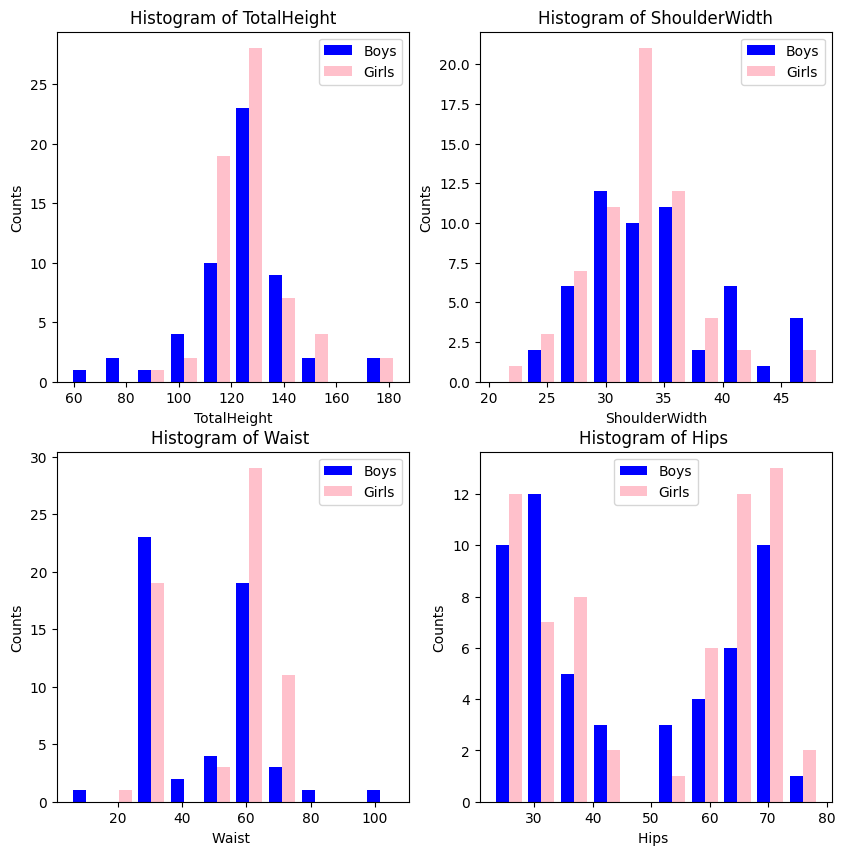

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    column = columns[i]
    ax.hist([boys[column], girls[column]], color=['blue', 'pink'], label=['Boys', 'Girls'])
    ax.set_xlabel(column)
    ax.set_ylabel('Counts')
    ax.set_title('Histogram of {}'.format(column))
    ax.legend()
plt.show()

In [ ]:
for column in columns:
  boys_interval = scipy.stats.t.interval(0.95, len(boys) - 1, loc = boys[column].mean(), scale = scipy.stats.sem(boys[column]))
  girls_interval = scipy.stats.t.interval(0.95, len(girls) - 1, loc = girls[column].mean(), scale = scipy.stats.sem(girls[column]))
  print("Confidence interval for", column)
  print("Boys:", boys_interval)
  print("Girls:", girls_interval)
  print()

Confidence interval for TotalHeight
Boys: (117.68271101938657, 129.9202519435764)
Girls: (122.92210832217965, 130.67471707464577)

Confidence interval for ShoulderWidth
Boys: (32.91566496925176, 36.040631327044544)
Girls: (31.78852079032717, 34.00957444776806)

Confidence interval for Waist 
Boys: (41.18332682903018, 51.3855620598587)
Girls: (46.76823825021182, 55.07366651169295)

Confidence interval for Hips 
Boys: (41.54648127547121, 51.02240761341767)
Girls: (46.00661588419496, 55.190209512630446)



In [ ]:
p_value_TotalHeight = scipy.stats.ttest_ind(boys['TotalHeight'], girls['TotalHeight']).pvalue
p_value_ShoulderWidth = scipy.stats.ttest_ind(boys['ShoulderWidth'], girls['ShoulderWidth']).pvalue
p_value_Waist = scipy.stats.ttest_ind(boys['Waist '], girls['Waist ']).pvalue
p_value_Hips = scipy.stats.ttest_ind(boys['Hips '], girls['Hips ']).pvalue

# Вывод p-value
print("p-value для TotalHeight:", p_value_TotalHeight)
print("p-value для ShoulderWidth:", p_value_ShoulderWidth)
print("p-value для Waist:", p_value_Waist)
print("p-value для Hips:", p_value_Hips)

p-value для TotalHeight: 0.3956943477471464
p-value для ShoulderWidth: 0.09501011387699174
p-value для Waist: 0.1566871504607796
p-value для Hips: 0.19473597212002536


In [ ]:
alpha = 0.05
if p_value_TotalHeight < alpha or p_value_ShoulderWidth < alpha or p_value_Waist < alpha or p_value_Hips < alpha:
    print("Есть статистически значимые различия между мальчиками и девочками.")
    print("Рекомендуется разрабатывать отдельные лекала для мальчиков и девочек.")
else:
    print("Статистически значимых различий между мальчиками и девочками не обнаружено.")
    print("Можно использовать общую размерную сетку для производства детской хоккейной формы.")

Статистически значимых различий между мальчиками и девочками не обнаружено.
Можно использовать общую размерную сетку для производства детской хоккейной формы.
